In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Booheymen\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# How well do jobs and skills pay for Data Analysts?

#### Methology
1. Evaluate median salary for top 6 data jobs
2. Find median salary per skill for Data Analysts
3. Visualize for highest paying skills and most demanded skills

In [3]:
# filter for the job titles and country
df_india = df[(df['job_country'] == 'India')].dropna(subset=['salary_year_avg'])
df_india

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1209,Machine Learning Engineer,Computer Vision Developer (R&D),"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-02-18 13:12:30,False,False,India,year,79200.0,NaN,Bosch Group,"[python, opencv, tensorflow, pytorch, keras, m...","{'libraries': ['opencv', 'tensorflow', 'pytorc..."
2022,Data Engineer,Data Engineer - SQL (Power BI),India,via Ai-Jobs.net,Full-time,False,India,2023-10-31 13:09:54,False,False,India,year,156500.0,NaN,Gartner,"[java, t-sql, sql, azure, power bi, dax, notion]","{'analyst_tools': ['power bi', 'dax'], 'async'..."
2785,Data Engineer,Staff Software Engineer - Data Engineering (Ja...,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-05-26 13:13:28,False,False,India,year,147500.0,NaN,Zscaler,"[java, nosql, neo4j, redshift, aws, spring, sp...","{'analyst_tools': ['excel'], 'cloud': ['redshi..."
3190,Senior Data Engineer,Senior Big Data DevOps & Deployment Engineer,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-07-07 13:14:21,False,False,India,year,79200.0,NaN,ServiceNow,"[sql, perl, bash, groovy, python, shell, redis...","{'analyst_tools': ['tableau'], 'cloud': ['azur..."
3930,Data Scientist,Lead Data Scientist,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-12-12 13:27:33,False,False,India,year,114516.0,NaN,Boeing,"[python, r, c++, tensorflow, tableau]","{'analyst_tools': ['tableau'], 'libraries': ['..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783733,Senior Data Scientist,Senior Data Scientist,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-06-27 06:12:11,False,False,India,year,157500.0,NaN,Publicis Groupe,"[aws, spark, tableau, cognos, excel, powerpoin...","{'analyst_tools': ['tableau', 'cognos', 'excel..."
784033,Data Analyst,Recruitment Data Analyst,"Mumbai, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-06-07 06:10:15,False,False,India,year,111175.0,NaN,Framestore,"[power bi, tableau]","{'analyst_tools': ['power bi', 'tableau']}"
784768,Data Scientist,SR. DATA SCIENTIST,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-01-03 06:25:25,False,False,India,year,157500.0,NaN,Optiv,"[r, python, sql, databricks, power bi]","{'analyst_tools': ['power bi'], 'cloud': ['dat..."
785395,Data Engineer,Senior Consultant - Tech Consulting -Azure Dat...,India,via Ai-Jobs.net,Full-time,False,India,2023-12-19 06:10:41,False,False,India,year,64800.0,NaN,EY,"[sql, python, azure, databricks, spark, power ...","{'analyst_tools': ['power bi', 'tableau', 'qli..."


In [12]:
job_titles = df_india['job_title_short'].value_counts().head(6).index.to_list()
df_india_top_6_job_titles = df_india[df_india['job_title_short'].isin(job_titles)]
df_india_top_6_job_order = df_india_top_6_job_titles.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

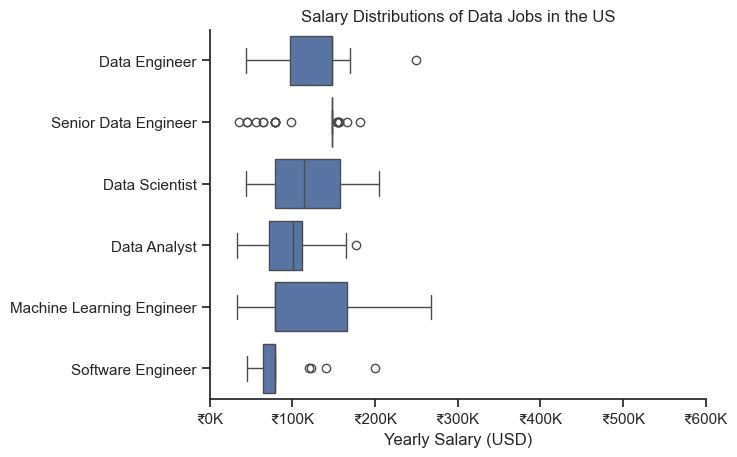

In [14]:
sns.boxplot(data=df_india_top_6_job_titles, x='salary_year_avg', y='job_title_short', order=df_india_top_6_job_order)
sns.set_theme(style='ticks')
sns.despine()

# this is all the same
plt.title('Salary Distributions of Data Jobs in the US')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 600000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'₹{int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

# Investigate Median Salary Vs Skill for Data Analysts

In [28]:
df_DA_india =df[(df['job_title_short']=='Data Analyst') & (df['job_country'] == 'India')].dropna(subset='salary_year_avg').copy()
df_DA_india=df_DA_india.explode('job_skills').dropna(subset='job_skills')
df_DA_india[['salary_year_avg', 'job_skills']]

,salary_year_avg,job_skills
11412,50400.0,python
11412,50400.0,sql
11412,50400.0,aws
11412,50400.0,azure
11412,50400.0,excel
...,...,...
777313,111202.0,excel
777313,111202.0,looker
777313,111202.0,powerpoint
784033,111175.0,power bi


In [34]:
df_DA_top_pay = df_DA_india.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='median',ascending=False)
df_DA_top_pay=df_DA_top_pay.head(10)
df_DA_top_pay

,count,median
job_skills,,
postgresql,1,165000.0
pyspark,1,165000.0
gitlab,1,165000.0
linux,1,165000.0
mysql,1,165000.0
gdpr,2,163782.0
mongodb,6,163782.0
scala,3,163782.0
neo4j,1,163782.0


In [35]:
df_DA_top_skill = df_DA_india.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False)
df_DA_top_skill = df_DA_top_skill.head(10)
df_DA_top_skill

,count,median
job_skills,,
sql,46,96050.0
excel,39,98500.0
python,36,96050.0
tableau,20,108087.5
r,18,79200.0
power bi,17,111175.0
azure,15,93600.0
aws,12,79200.0
oracle,11,79200.0


## Creates two horizontal bar charts:

1) Displays the highest paid skills
2) Shows the most in demand skills

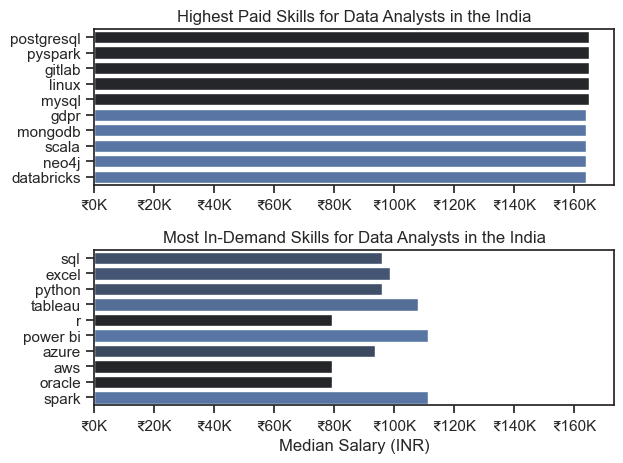

In [51]:
fig,ax = plt.subplots(2,1)
sns.barplot(
    data=df_DA_top_pay,
    x='median',
    y=df_DA_top_pay.index,
    hue='median',
    ax=ax[0],
    palette='dark:b_r',
    legend=False
)
ax[0].set_title('Highest Paid Skills for Data Analysts in the India')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'₹{int(x/1000)}K'))

sns.barplot(
    data=df_DA_top_skill,
    x='median',
    y=df_DA_top_skill.index,
    hue='median',
    ax=ax[1],
    palette='dark:b',
    legend=False
)
ax[1].set_title('Most In-Demand Skills for Data Analysts in the India')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (INR)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'₹{int(x/1000)}K'))

sns.set_theme(style='ticks')
plt.tight_layout()
plt.show()
